1\. **PCA on 3D dataset**

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

In [ ]:
import numpy as np
from scipy import linalg as la
from matplotlib import pyplot as plt

[0 2 1]
[2.54913514e+01+0.j 2.01759743e+00+0.j 2.69750508e-15+0.j] 
 [[-0.11044427  0.56668809 -0.81649658]
 [-0.58360407 -0.70195415 -0.40824829]
 [-0.80449261  0.43142204  0.40824829]]
[2.56175500e+01 2.01882300e+00 9.13737538e-31] 
 [[-0.11014482 -0.58397489 -0.80426453]
 [-0.56674637  0.70164568 -0.43184707]
 [-0.81649658 -0.40824829  0.40824829]]
The matrix is not diagonalizable.
Eigenvectors are equal: False
Eigenvalues are equal: True
explained_variance_ratio [9.26656687e-01+0.j 7.33433126e-02+0.j 9.80591844e-17+0.j]
cumulative_variance_ratio [0.92665669+0.j 1.        +0.j 1.        +0.j]
num_components 2
shape of data_pca (1000, 2)
shape of data (1000, 3)


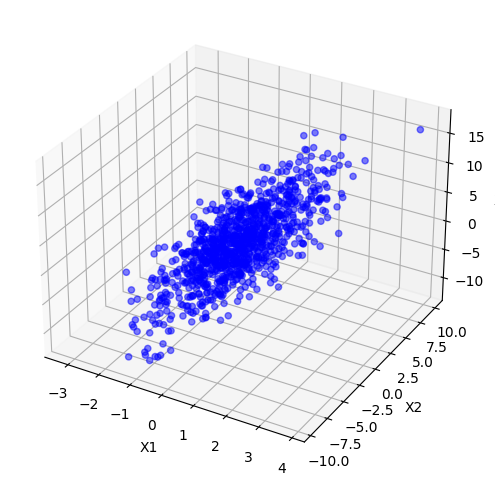

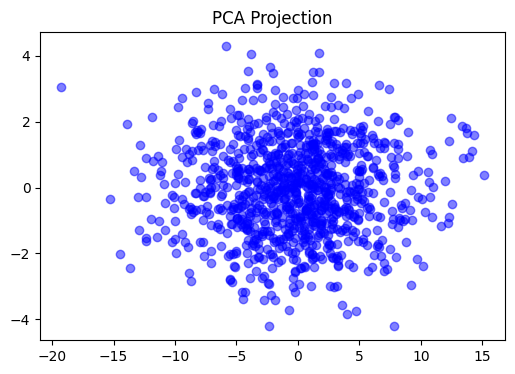

In [ ]:
# Set seed for reproducibility
np.random.seed(42)

# Number of entries
N = 1000

# Generate random numbers according to normal distribution for each feature
x1 = np.random.normal(0, 1, N)
x2 = x1 + np.random.normal(0, 3, N)
x3 = 2 * x1 + x2

# Combine features into a 3D dataset
data = np.column_stack((x1, x2, x3))

# Calculate covariance matrix
cov_matrix = np.cov(data, rowvar=False)

# Eigendecomposition
eigenvalues, eigenvectors = la.eig(cov_matrix)
idx = eigenvalues.argsort()[::-1]
print(idx)
eigenvalues = eigenvalues[idx]
eigenvectors =eigenvectors[:,idx]
print(eigenvalues,'\n', eigenvectors)
# Singular Value Decomposition
U, S, Vt = la.svd(data, full_matrices=False)

# Eigenvectors are columns of Vt
eigenvectors_svd = Vt


# Eigenvalues are squares of singular values

eigenvalues_svd =S**2/(N-1)
print(eigenvalues_svd,'\n', eigenvectors_svd)


if np.all(np.iscomplex(eigenvalues)):
    print("The matrix is diagonalizable.")
else:
    print("The matrix is not diagonalizable.")

# Check if eigenvectors and eigenvalues are the same
print("Eigenvectors are equal:", np.allclose(eigenvectors, eigenvectors_svd,rtol=0.01))
print("Eigenvalues are equal:", np.allclose(eigenvalues, eigenvalues_svd,rtol=0.01))

# Calculate explained variance
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)

# Find the number of principal components to retain 99% of the total variability
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
num_components = np.argmax(cumulative_variance_ratio >= 0.99) + 1

print('explained_variance_ratio',explained_variance_ratio)
print('cumulative_variance_ratio',cumulative_variance_ratio)
print('num_components',num_components)
# Retain only the top principal components
top_eigenvectors = eigenvectors[:, :num_components]

# Transform the data using the retained components
data_pca = np.dot(data, top_eigenvectors)

# Plot original and PCA-transformed data

# Original basis
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c='blue', marker='o', alpha=0.5)

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')

print('shape of data_pca',data_pca.shape)
print('shape of data',data.shape)

fig, axes = plt.subplots(1, 1, figsize=(6, 4))


axes.scatter(data_pca[:, 0], data_pca[:, 1], c='blue', alpha=0.5)
axes.set_title('PCA Projection')


plt.show()




1.   as we can see the 2 procedures doesnt exactly yeild the same result, because the 2 libraries may use different subroutines for determining the sign ambiguity, moreover  the eigenvalue decomposition of a matrix is not unique in general. However, there are some conditions under which the eigenvalue decomposition becomes unique. Under certain conditions, such as when the matrix of data is diagonalizable (has a complete set of linearly independent eigenvectors), the eigenvalue decomposition is unique up to the ordering and sign issues mentioned above. However, not all matrices are diagonalizable. If a matrix is not diagonalizable, it may still have an eigenvalue decomposition with repeated eigenvalues or a defective matrix, leading to non-unique decompositions. In practice, numerical algorithms may also introduce small variations in the results due to finite precision arithmetic.

2.   as we suspected pca should eiminate at least the X3 column because it had no additional information in it since it was a linear combination of 2 other columns. so we could get 99 percent of information in pca projection with 2 components.so the results make sense.


2\. **PCA on a nD dataset**

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

In [ ]:
num_noise_variables = 10
noise = np.random.normal(0, 0.05, size=(N, num_noise_variables))

# Combine features into a 3D dataset with noise
data_with_noise = np.column_stack((x1, x2, x3, noise))

# Calculate covariance matrix
cov_matrix_with_noise = np.cov(data_with_noise, rowvar=False)

# Eigendecomposition
eigenvalues_with_noise, eigenvectors_with_noise = np.linalg.eig(cov_matrix_with_noise)
print(eigenvalues_with_noise,'\n', eigenvectors_with_noise)

# Calculate explained variance
explained_variance_ratio_with_noise = eigenvalues_with_noise / np.sum(eigenvalues_with_noise)

# Find the number of principal components to retain 99% of the total variability
cumulative_variance_ratio_with_noise = np.cumsum(explained_variance_ratio_with_noise)
num_components_with_noise = np.argmax(cumulative_variance_ratio_with_noise >= 0.99) + 1
print('explained_variance_ratio_with_noise',explained_variance_ratio_with_noise)
print('cumulative_variance_ratio_with_noise',cumulative_variance_ratio_with_noise)
print('num_components_with_noise',num_components_with_noise)
# Retain only the top principal components
top_eigenvectors_with_noise = eigenvectors_with_noise[:, :num_components_with_noise]

# Transform the data using the retained components
data_pca_with_noise = np.dot(data_with_noise, top_eigenvectors_with_noise)


[2.54913774e+01 2.01762866e+00 2.18675412e-15 3.01615154e-03
 2.78312267e-03 2.71553128e-03 2.11878724e-03 2.61328595e-03
 2.54752686e-03 2.46980517e-03 2.20703228e-03 2.34572111e-03
 2.32902763e-03] 
 [[-1.10444140e-01 -5.66683890e-01  8.16496581e-01  6.68045693e-05
   9.91060525e-05 -4.70908709e-04  3.12463996e-04  1.32216548e-03
   9.86297795e-04  5.54246450e-04 -2.87121931e-05 -1.02730405e-03
   6.13235181e-04]
 [-5.83603861e-01  7.01947726e-01  4.08248290e-01 -1.32823569e-04
  -2.73985133e-04  1.11420953e-03 -1.26270106e-04 -1.88892587e-03
  -1.36599342e-03 -5.25819528e-04 -1.37465205e-04  1.32490899e-03
  -6.49196357e-04]
 [-8.04492141e-01 -4.31420054e-01 -4.08248290e-01  7.85569852e-07
  -7.57730281e-05  1.72392116e-04  4.98657887e-04  7.55405086e-04
   6.06602174e-04  5.82673371e-04 -1.94889591e-04 -7.29699111e-04
   5.77274004e-04]
 [-3.75336263e-04  4.78722079e-04 -2.56052580e-16 -3.94694929e-02
  -4.71911623e-01 -7.26948859e-01  1.70793453e-01 -2.75334506e-01
   8.03771277e-

as we compare the results of data with noise and data without noise we can see the the other 10 column we added appeared as a very low eigen values in pca and thus they are just noise and we didnt expect they carry much informations. we see that again with the 2 components we can retrieve 99 percent of information. it shows that dimentionality reduction with pca can be seen as noise reduction tool.

3\. **Optional**: **PCA on the MAGIC dataset**

Perform a PCA on the magic04.data dataset.

In [ ]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/